# Use Monte-Carlo method to compute pi value

This example used in this tutorial comes from [Scoop example computation of pi](http://scoop.readthedocs.io/en/0.7/examples.html#computation-of). We will use a [Monte-Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) to compute the value of pi.

As written in the Scoop documentation, it spawns two pseudo-random numbers that are fed to the hypot function which calculates the hypotenuse of its parameters. This step computes the Pythagorean equation ($\sqrt{x^2+y^2}$) of the given parameters to find the distance from the origin (0,0) to the randomly placed point (which X and Y values were generated from the two pseudo-random values). Then, the result is compared to one to evaluate if this point is inside or outside the unit disk. If it is inside (have a distance from the origin lesser than one), a value of one is produced (red dots in the figure), otherwise the value is zero (blue dots in the figure). The experiment is repeated *tries* number of times with new random values.

![alt text](http://scoop.readthedocs.io/en/0.7/_images/monteCarloPiExample.gif "Monte-Carlo pi calculation example")

## Function that test if a couple of value is inside the disk

We will use function for the `math` library to test if a couple of numbers is inside the unit disk. The mathematical function corresponds to $\sqrt{x^2+y^2}<1$. The evaluation of $\pi$ will correspond to $4*\frac{I}{t}$ where:

- $I$ correspond of the number of time the point is inside the disk
- $t$ total number of points of the evaluation. 

The Python functions can be written like this:

In [2]:
from math import hypot
# Test if point p(x, y) is inside the unit disk
# Returns: True if inside, False if outside
def test(p):
    return hypot(p[0], p[1]) < 1

# Returns estimated pi value of an experiment
def compute_pi(i, t):
    return 4.0*i/t

Now let's try this function on some obvious values. We will define an `evaluate` function that take all elements of the list and test if it is inside or outside the unit disk

In [79]:
# Evaluates a list of values passed as an argument
# returns 2 lists:
# * inside: values inside the disk
# * outside: values outside the disk
def evaluate(test_values):
    inside = []
    outside = []
    for p in test_values:
        if test(p):
            inside.append(p)
        else:
            outside.append(p)
    return inside, outside

range25 = [i/100.0 for i in range(0, 101, 25)]*5
test_values = zip(range25, sorted(range25))
inside, outside = evaluate(test_values)
print("inside: %s" % inside)
print("outside: %s" % outside)
estimate_pi = compute_pi(len(inside),len(test_values))
print("pi = %f" % estimate_pi)

inside: [(0.0, 0.0), (0.25, 0.0), (0.5, 0.0), (0.75, 0.0), (0.0, 0.25), (0.25, 0.25), (0.5, 0.25), (0.75, 0.25), (0.0, 0.5), (0.25, 0.5), (0.5, 0.5), (0.75, 0.5), (0.0, 0.75), (0.25, 0.75), (0.5, 0.75)]
outside: [(1.0, 0.0), (1.0, 0.25), (1.0, 0.5), (0.75, 0.75), (1.0, 0.75), (0.0, 1.0), (0.25, 1.0), (0.5, 1.0), (0.75, 1.0), (1.0, 1.0)]
pi = 2.400000


We can plot the results using **matplotlib**. We will define a `plot_points` function that will plot the points on a grid with:
- *blue* value if it is located outside the disk
- *red* value if it is located inside the disk

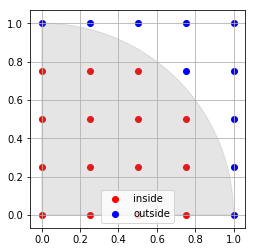

In [80]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Plots points on a grid
# Takes list of points that are inside and points that are outside
def plot_points(inside, outside, alpha=0.3):
    fig, ax = plt.subplots()
    
    circle = Wedge((0, 0), 1, 0, 90, color='gray', alpha=0.2)
    ax.add_patch(circle)

    ax.scatter([p[0] for p in inside], \
               [p[1] for p in inside], \
               c='red', label='inside', alpha=alpha)
    ax.scatter([p[0] for p in outside], \
               [p[1] for p in outside], \
               c='blue', label='outside', alpha=alpha)

    ax.legend()
    ax.axes.set_aspect('equal')
    ax.grid(True)

    plt.show()
    
plot_points(inside, outside, alpha=1)

Let's generate a lot of random values using `random` function.

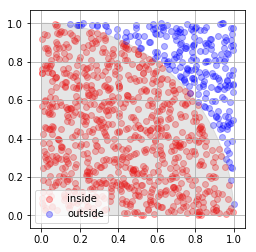

pi = 3.116000


In [81]:
from random import random
test_values = [(random(), random()) for p in range(1000)]
inside, outside = evaluate(test_values)
plot_points(inside, outside)
estimate_pi = compute_pi(len(inside),len(test_values))
print("pi = %f" % estimate_pi)

Let's do the same using `numpy` and a lot more value.

In [82]:
import numpy as np
test_values = np.random.rand(30000, 2)
i = np.sum(map(test, test_values))
estimate_pi = compute_pi(float(i),float(len(test_values)))
print("pi = %f" % estimate_pi)

pi = 3.131733
